# Hotel Bookings EDA

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

## Load & Inspect the Data

In [239]:
df = pd.read_csv('dataset.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

display(df.head())

print(f"Dataset shape: {df.shape}")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


Dataset shape: (36285, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p-c                       36285 non-null  int64  
 12  p-not-c                   36285 non-null  int64  
 13  average_price             36285 no

## Data Cleaning

In [240]:
def parse_date(date_str):
    """Parse a date string into a datetime object using several possible formats."""
    date_str = str(date_str).strip()
    formats = ["%d-%m-%y", "%m/%d/%Y", "%d/%m/%Y", "%m-%d-%y", "%d-%m-%Y", "%Y-%m-%d"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT

df['date_of_reservation'] = df['date_of_reservation'].apply(parse_date)

print('Converted date_of_reservation values:')
display(df['date_of_reservation'].head())

Converted date_of_reservation values:


,date_of_reservation
0,2015-10-02
1,2018-11-06
2,2018-02-28
3,2017-05-20
4,2018-04-11


## Cancellation Analysis

Booking Status Counts:
 booking_status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


<ipython-input-241-615921a21515>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='booking_status', palette='viridis')


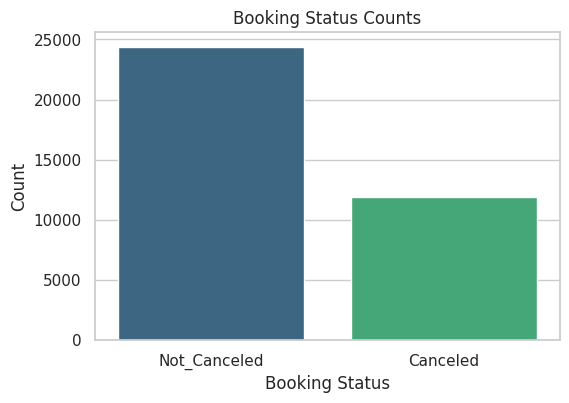

In [241]:
# Count the booking statuses
status_counts = df['booking_status'].value_counts()
print("Booking Status Counts:\n", status_counts)

# Plot booking status counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='booking_status', palette='viridis')
plt.title('Booking Status Counts')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

## Adults & Children

<ipython-input-242-201824733463>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='number_of_adults', palette='Blues')


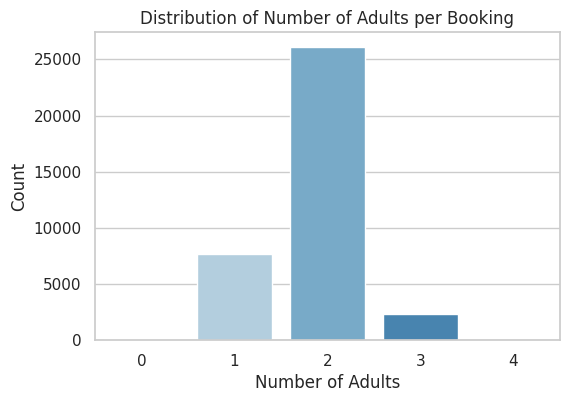

<ipython-input-242-201824733463>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='number_of_children', palette='Oranges')


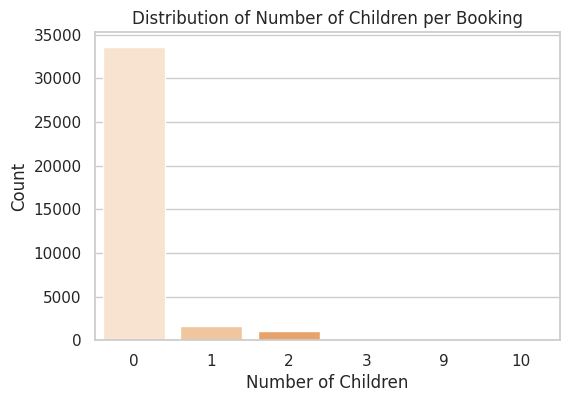

In [242]:
# Distribution of number of adults
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='number_of_adults', palette='Blues')
plt.title('Distribution of Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()

# Distribution of number of children
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='number_of_children', palette='Oranges')
plt.title('Distribution of Number of Children per Booking')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

## Stay Duration Analysis

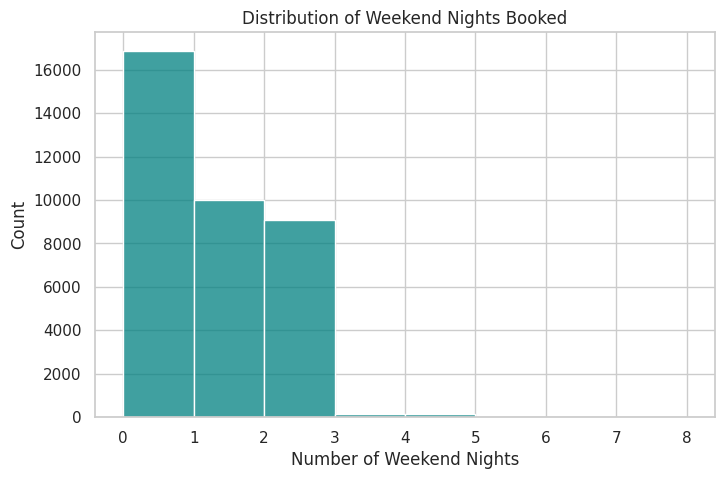

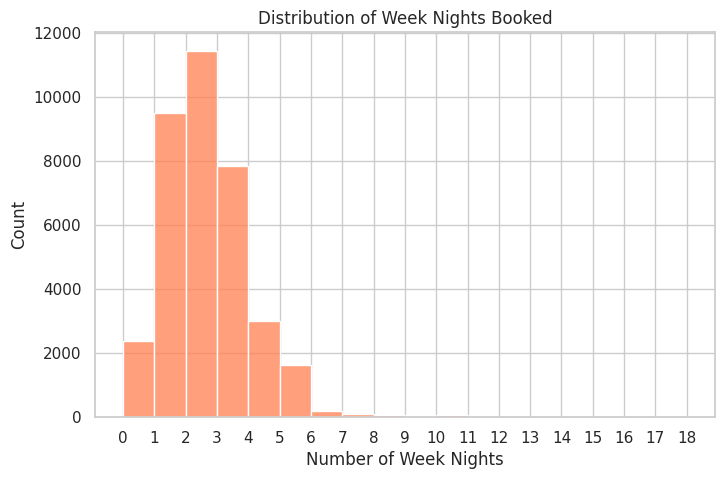

In [243]:
# Weekend nights distribution
plt.figure()
max_weekend = int(df['number_of_weekend_nights'].max())
sns.histplot(df['number_of_weekend_nights'], bins=range(0, max_weekend + 2), kde=False, color='teal')
plt.title('Distribution of Weekend Nights Booked')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Count')
plt.show()

# Week nights distribution
plt.figure()
max_week = int(df['number_of_week_nights'].max())
sns.histplot(df['number_of_week_nights'], bins=range(0, max_week + 2), kde=False, color='coral')
plt.title('Distribution of Week Nights Booked')
plt.xlabel('Number of Week Nights')
plt.ylabel('Count')
plt.xticks(range(0, max_week + 2))
plt.show()

## Lead Time Analysis

Lead Time Statistics:
 count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64


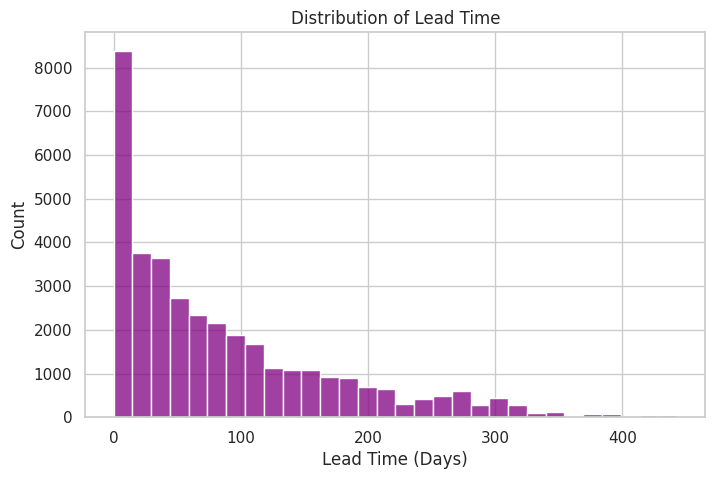

<ipython-input-244-9e3fd48cb5c3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y='lead_time', data=df, palette='Set2')


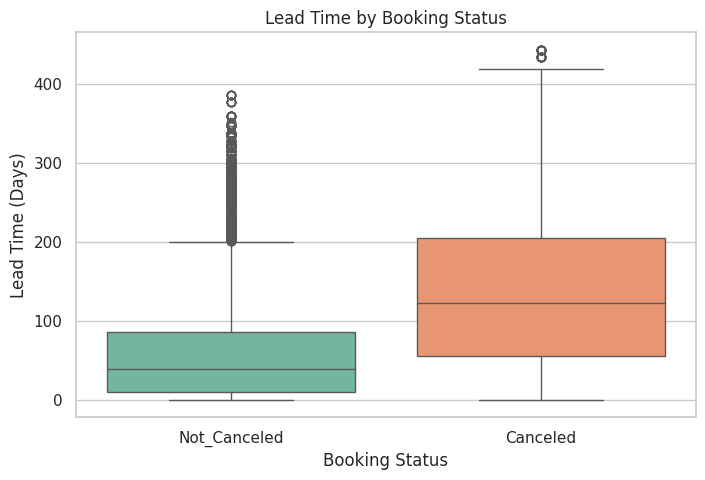

In [244]:
print("Lead Time Statistics:\n", df['lead_time'].describe())

# Histogram of lead times
plt.figure()
sns.histplot(df['lead_time'], kde=False, color='purple', bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.show()

# Boxplot of lead time by booking status
plt.figure()
sns.boxplot(x='booking_status', y='lead_time', data=df, palette='Set2')
plt.title('Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (Days)')
plt.show()

## Market Segments & Booking Channels

<ipython-input-245-11b97ff5fbc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='market_segment_type', palette='coolwarm')


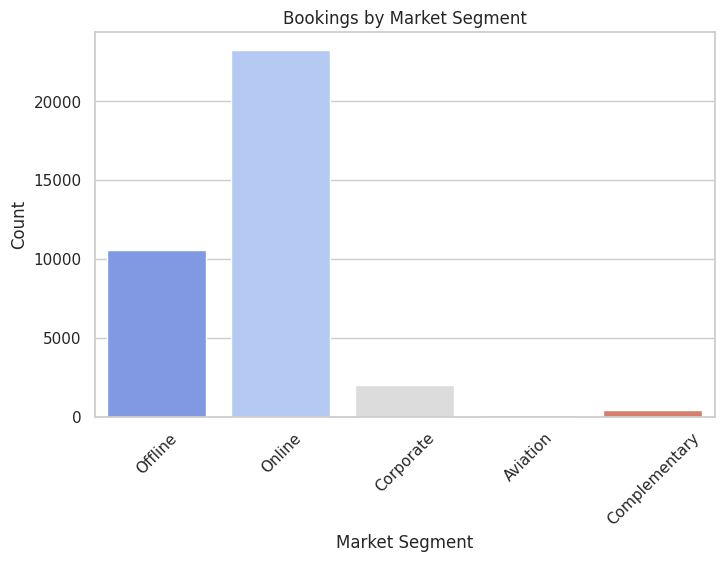

Market Segment Cancellation Rates:
 booking_status       Canceled  Not_Canceled  cancellation_rate
market_segment_type                                           
Aviation                   37            88           0.296000
Complementary               0           391           0.000000
Corporate                 220          1797           0.109073
Offline                  3154          7377           0.299497
Online                   8478         14743           0.365101


In [245]:
# Plot count of bookings by market segment
plt.figure()
sns.countplot(data=df, x='market_segment_type', palette='coolwarm')
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Calculate cancellation rate by market segment
market_cancel = df.groupby(['market_segment_type', 'booking_status']).size().unstack(fill_value=0)
market_cancel['cancellation_rate'] = market_cancel.get('Canceled', 0) / (market_cancel.get('Canceled', 0) + market_cancel.get('Not_Canceled', 0))
print("Market Segment Cancellation Rates:\n", market_cancel)

## Meal Plans & Room Types

<ipython-input-246-4bd9c6085aa5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type_of_meal', palette='magma')


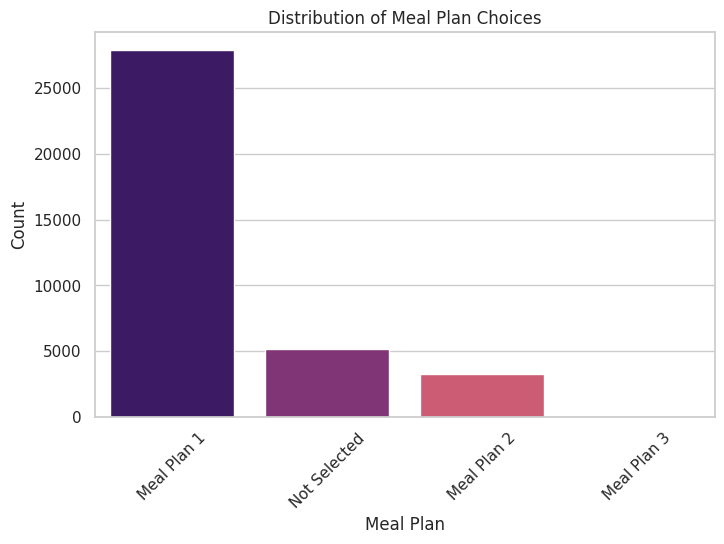

<ipython-input-246-4bd9c6085aa5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='spring')


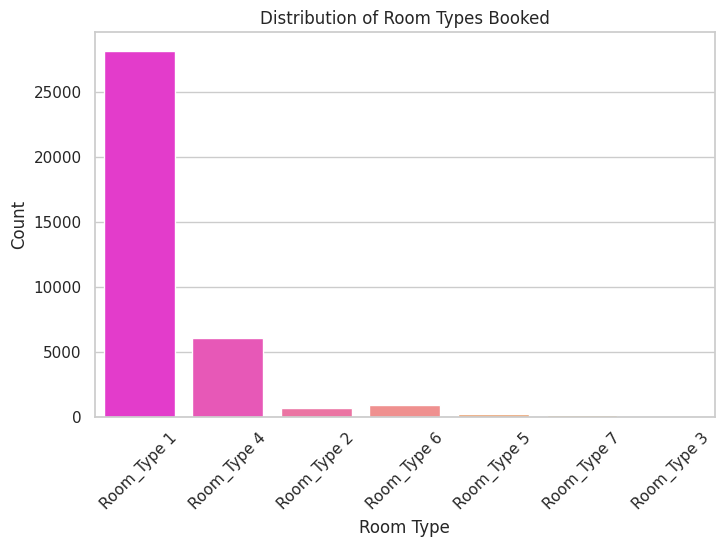

Room Type Cancellation Rates:
 booking_status  Canceled  Not_Canceled  cancellation_rate
room_type                                                
Room_Type 1         9076         19062           0.322553
Room_Type 2          228           464           0.329480
Room_Type 3            2             5           0.285714
Room_Type 4         2069          3990           0.341475
Room_Type 5           72           193           0.271698
Room_Type 6          406           560           0.420290
Room_Type 7           36           122           0.227848


In [246]:
# Distribution of meal plans
plt.figure()
sns.countplot(data=df, x='type_of_meal', palette='magma')
plt.title('Distribution of Meal Plan Choices')
plt.xlabel('Meal Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of room types
plt.figure()
sns.countplot(data=df, x='room_type', palette='spring')
plt.title('Distribution of Room Types Booked')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Calculate cancellation rate by room type
room_cancel = df.groupby(['room_type', 'booking_status']).size().unstack(fill_value=0)
room_cancel['cancellation_rate'] = room_cancel.get('Canceled', 0) / (room_cancel.get('Canceled', 0) + room_cancel.get('Not_Canceled', 0))
print("Room Type Cancellation Rates:\n", room_cancel)

## Average Price & Special Requests

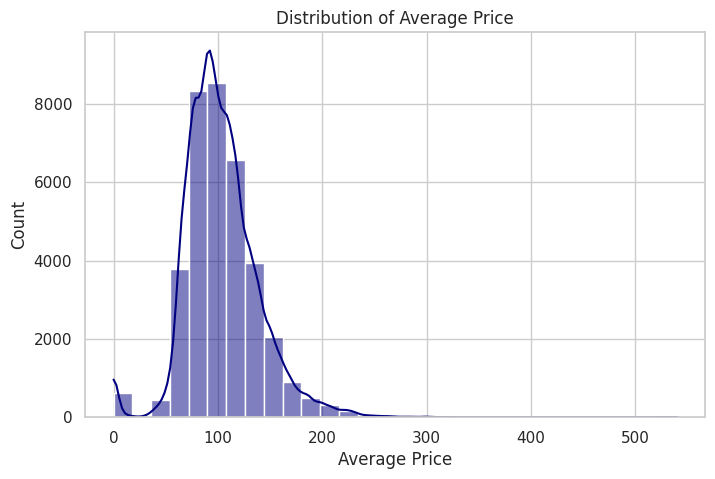

<ipython-input-247-b15a2d040bad>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y='average_price', data=df, palette='pastel')


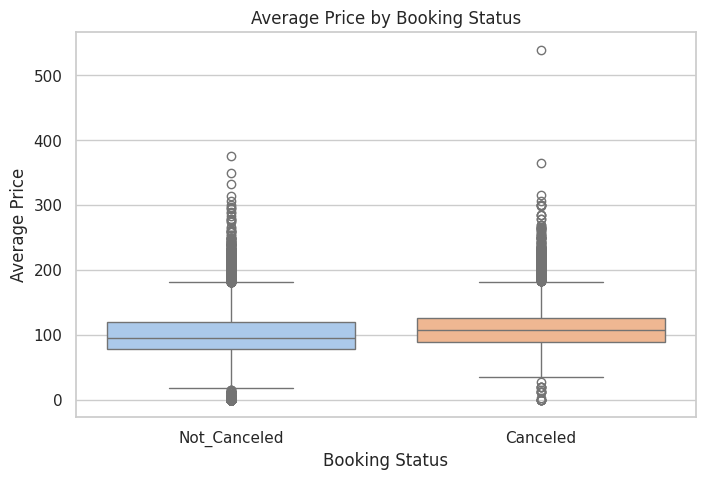

<ipython-input-247-b15a2d040bad>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='special_requests', palette='YlGnBu')


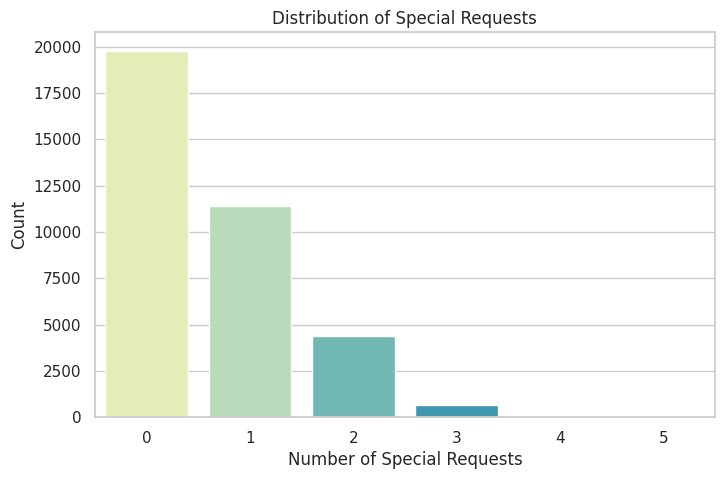

In [247]:
# Distribution of average price
plt.figure()
sns.histplot(df['average_price'], kde=True, bins=30, color='navy')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.show()

# Boxplot: Average price by booking status
plt.figure()
sns.boxplot(x='booking_status', y='average_price', data=df, palette='pastel')
plt.title('Average Price by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.show()

# Special requests analysis
plt.figure()
sns.countplot(data=df, x='special_requests', palette='YlGnBu')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

## Previous Cancellations (P-C)

Descriptive Statistics for P-C:
 count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: p-c, dtype: float64


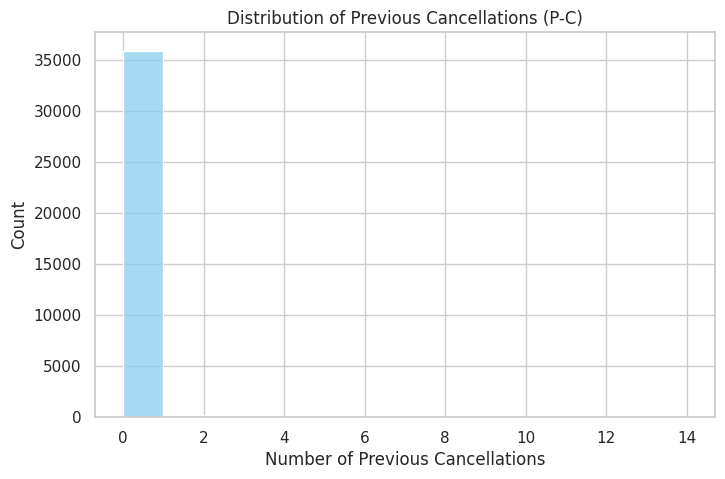

In [248]:
print("Descriptive Statistics for P-C:\n", df['p-c'].describe())

plt.figure()
sns.histplot(df['p-c'], bins=range(int(df['p-c'].min()), int(df['p-c'].max()) + 2), kde=False, color='skyblue')
plt.title('Distribution of Previous Cancellations (P-C)')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')
plt.show()

## Previous Non-Canceled Bookings (P-not-C)

Descriptive Statistics for P-not-C:
 count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: p-not-c, dtype: float64


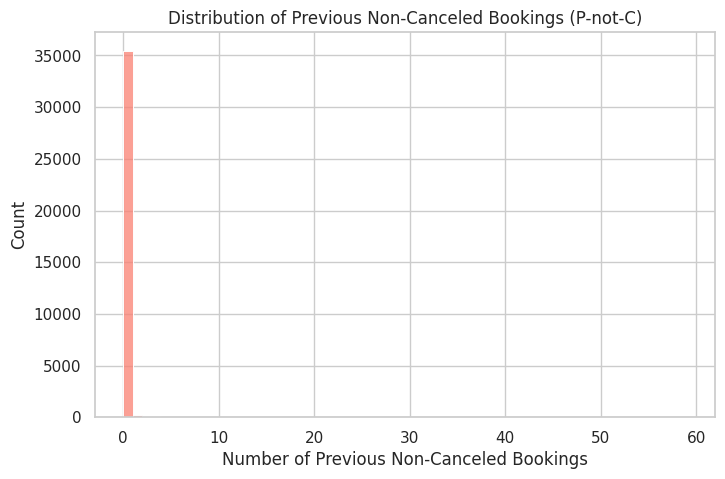

In [249]:
print("Descriptive Statistics for P-not-C:\n", df['p-not-c'].describe())

plt.figure()
sns.histplot(df['p-not-c'], bins=range(int(df['p-not-c'].min()), int(df['p-not-c'].max()) + 2), kde=False, color='salmon')
plt.title('Distribution of Previous Non-Canceled Bookings (P-not-C)')
plt.xlabel('Number of Previous Non-Canceled Bookings')
plt.ylabel('Count')
plt.show()

## Repeated Bookings

Descriptive Statistics for repeated:
 count    36285.000000
mean         0.025630
std          0.158032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated, dtype: float64


<ipython-input-250-2f95ad6c3b10>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='repeated', palette='viridis')


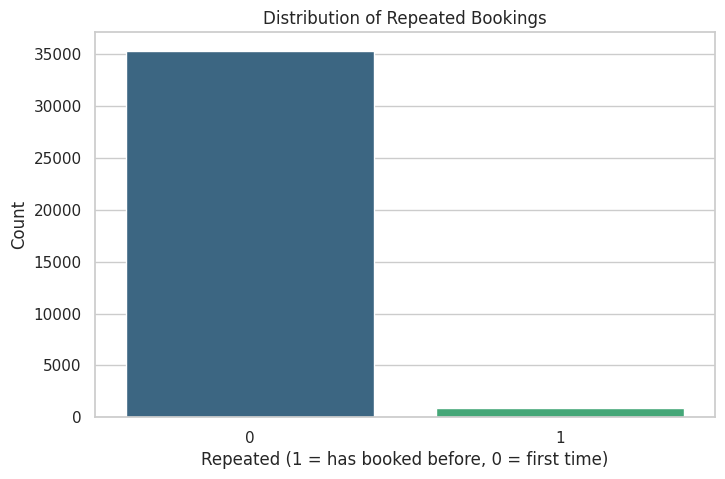

In [250]:
print("Descriptive Statistics for repeated:\n", df['repeated'].describe())

plt.figure()
sns.countplot(data=df, x='repeated', palette='viridis')
plt.title('Distribution of Repeated Bookings')
plt.xlabel('Repeated (1 = has booked before, 0 = first time)')
plt.ylabel('Count')
plt.show()

## Car Parking Space

Descriptive Statistics for car parking space:
 count    36285.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: car_parking_space, dtype: float64


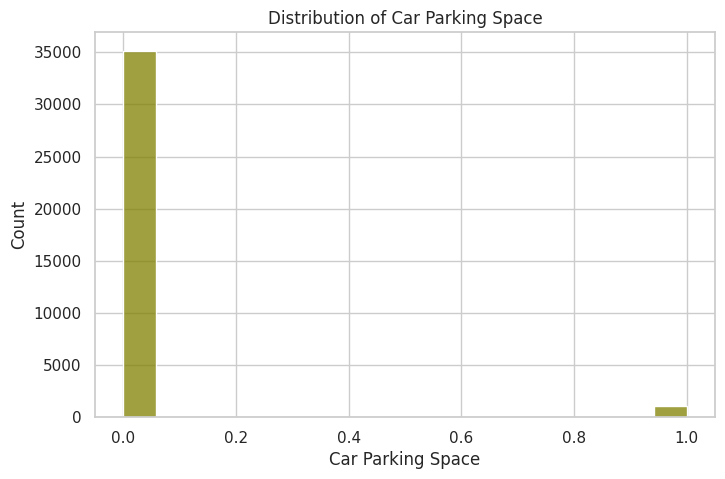

In [251]:
print("Descriptive Statistics for car parking space:\n", df['car_parking_space'].describe())

plt.figure()
sns.histplot(df['car_parking_space'], kde=False, color='olive')
plt.title('Distribution of Car Parking Space')
plt.xlabel('Car Parking Space')
plt.ylabel('Count')
plt.show()

## Preprocessing

Handle missing values, remove duplicates, and standardize/encode features.

In [253]:
df['repeated'] = df['repeated'].astype(str)

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing numeric values with the median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardization
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

<ipython-input-253-6721cbf86628>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-253-6721cbf86628>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,-1.732003,-1.628431,2.221609,1.366111,1.981250,-0.491999,-0.178794,-0.506408,1.614661,-0.810717,0,-0.063385,-0.087444,-0.439538,-0.788212,2015-10-02,0.698093
1,-1.731908,-1.628431,-0.261636,0.217450,0.563741,2.370153,-0.178794,-0.506408,-0.933699,0.656678,0,-0.063385,-0.087444,0.092868,0.483646,2018-11-06,0.698093
2,-1.731812,0.299073,2.221609,0.217450,0.563741,-0.491999,-0.178794,-0.506408,-0.980244,0.656678,0,-0.063385,-0.087444,-1.522592,-0.788212,2018-02-28,-1.432474
3,-1.731717,-1.628431,-0.261636,-0.931212,-0.145013,-0.491999,-0.178794,-0.506408,1.463389,0.656678,0,-0.063385,-0.087444,-0.097521,0.483646,2017-05-20,-1.432474
4,-1.731621,-1.628431,-0.261636,0.217450,-0.145013,2.370153,-0.178794,-0.506408,-0.433336,0.656678,0,-0.063385,-0.087444,-0.753054,-0.788212,2018-04-11,-1.432474
